In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

datasets = load_dataset('lukebarousse/data_jobs')

df = datasets['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df['job_skills'] = df['job_skills'].apply(lambda skl_lst: ast.literal_eval(skl_lst) if pd.notna(skl_lst) else skl_lst )

In [9]:
df_explode = df.explode('job_skills')

df_sk_cnt = df_explode.groupby(['job_title_short','job_skills']).size().reset_index(name='skill_count')

df_sk_cnt = df_sk_cnt.sort_values(by='skill_count', ascending=False)

In [10]:
df_sk_cnt

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


<Axes: xlabel='job_skills'>

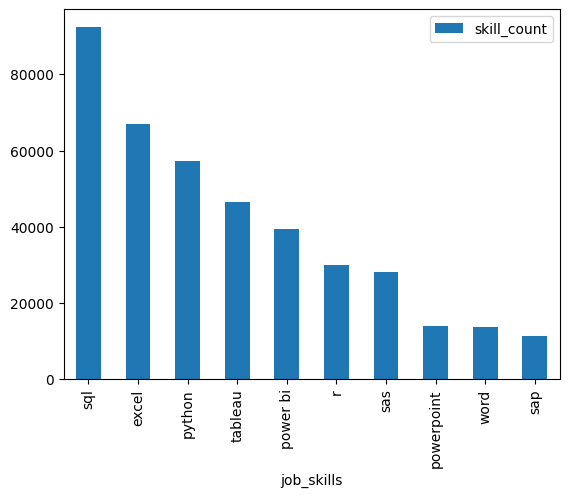

In [12]:
df_final = df_sk_cnt[df_sk_cnt.job_title_short == 'Data Analyst'].head(10)

df_final.plot(kind='bar', x='job_skills', y='skill_count')